--> Make File wo die Daten herkommen

In [2]:
# Purpose: Split the BioFairNet pilot dataset into train/test sets and save inputs/targets

import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
raw_path = "../data/raw/BioFairNet_Pilot1_Testrun.csv"
df = pd.read_csv(raw_path, sep=';')

In [70]:
df.tail()

,Time (min),Temperature (°C),Stiring,Pressure (bar)
9665,NaN,NaN,"0,1",NaN
9666,NaN,NaN,"0,1",NaN
9667,NaN,NaN,"0,1",NaN
9668,NaN,NaN,"0,1",NaN
9669,NaN,NaN,"0,1",NaN


In [71]:
nan_index = df.isnull().any(axis=1).idxmax() if df.isnull().any().any() else len(df)

df_small = df.iloc[:nan_index]

In [72]:
df_small.tail()

,Time (min),Temperature (°C),Stiring,Pressure (bar)
9220,16:45:58,250,"0,1","40,1"
9221,16:45:59,250,"0,1","40,1"
9222,16:46,250,"0,1","40,1"
9223,16:46,250,"0,1","40,1"
9224,16:46,250,"0,1","40,1"


In [66]:
import math
def comma_to_dot_round_half_up(val):
    if isinstance(val, str) and ',' in val:
        try:
            # Replace comma with dot and convert to float
            num = float(val.replace(",", "."))
            # Round up to the nearest 0.5
            return math.ceil(num * 2) / 2
        except ValueError:
            return val  # leave non-numeric strings untouched
    return val  # leave already-clean values untouched

In [78]:
df_small['Time (min)'] = [i*15 for i in range(len(df_small))]

/tmp/ipykernel_1232/4052622316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['Time (min)'] = [i*15 for i in range(len(df_small))]


In [79]:
df_small = df_small.map(lambda x: float(str(x).replace(",", ".")) if isinstance(x, str) and "," in x else x)

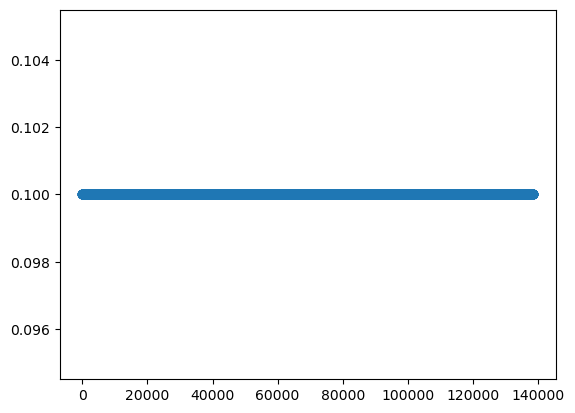

In [168]:
#plt.scatter(df_small['Time (min)'],df_small['Pressure (bar)'])
plt.scatter(df_small['Time (min)'],df_small['Stiring'])

In [80]:
X = df_small[["Time (min)", "Temperature (°C)", "Stiring"]]
y = df_small[["Pressure (bar)"]]

In [81]:
X.tail(2)

,Time (min),Temperature (°C),Stiring
9223,138345,250,0.1
9224,138360,250,0.1


In [82]:
X.head()

,Time (min),Temperature (°C),Stiring
0,0,114.8,0.1
1,15,114.9,0.1
2,30,114.9,0.1
3,45,114.9,0.1
4,60,114.9,0.1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
train_dir = "../data/processed/Train"
test_dir = "../data/processed/Test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

X_train.to_csv(os.path.join(train_dir, "BioFairNet_Pilot1_Testrun_Train_in.csv"), index=False)
y_train.to_csv(os.path.join(train_dir, "BioFairNet_Pilot1_Testrun_Train_out.csv"), index=False)
X_test.to_csv(os.path.join(test_dir, "BioFairNet_Pilot1_Testrun_Test_in.csv"), index=False)
y_test.to_csv(os.path.join(test_dir, "BioFairNet_Pilot1_Testrun_Test_out.csv"), index=False)

print("✅ Done: Train/Test split and files saved.")

✅ Done: Train/Test split and files saved.
